In [ ]:
#https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC4-1%E8%AC%9B-kaggle%E7%AB%B6%E8%B3%BD-%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E7%94%9F%E5%AD%98%E9%A0%90%E6%B8%AC-%E5%89%8D16-%E6%8E%92%E5%90%8D-a8842fea7077

In [3]:
from sklearn import preprocessing 
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns #簡易版matplotlib
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [5]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [6]:
train = pd.read_csv('/content/gdrive/MyDrive/data/Titanic/train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/data/Titanic/test.csv')
submit = pd.read_csv('/content/gdrive/MyDrive/data/Titanic/gender_submission.csv')

##### 使用info()函式觀察train以及test資料是否有空值，發現train的Age,Cabin,Embark有空值以及Test的Age, Fare, cabin有空值的情況，之後我們要想辦法來補這些空值。通常比賽能夠準確預測的關鍵都是在如何補空值

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.shape

(891, 12)

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train.describe() #count表示非空值個數

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
for i in train.columns:
    print(i,'\n',train[i].count())
# Cabin的缺失值最多

PassengerId 
 891
Survived 
 891
Pclass 
 891
Name 
 891
Sex 
 891
Age 
 714
SibSp 
 891
Parch 
 891
Ticket 
 891
Fare 
 891
Cabin 
 204
Embarked 
 889


In [7]:
#顯示眾數，年齡人數最多的年齡
train['Age'].mode()

0    24.0
dtype: float64

In [ ]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
#接下來由於要對整體資料做一些觀察，因此先將資料做合併
data = train.append(test)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#由於使用append合併之後會造成index重複問題，因此要將index重新設定
data.reset_index(inplace=True,drop=True)

# 資料分析

<AxesSubplot:xlabel='Survived', ylabel='count'>

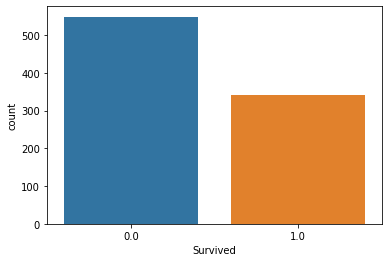

In [ ]:
sns.countplot(data['Survived']) #生存以及死亡的比例

<AxesSubplot:xlabel='Pclass', ylabel='count'>

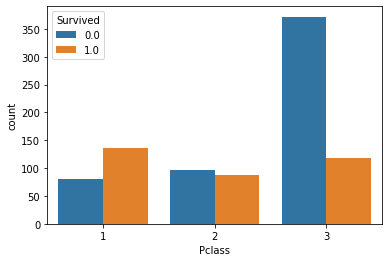

In [ ]:
sns.countplot(data['Pclass'],hue=data['Survived']) #艙等跟生存率的關係

<AxesSubplot:xlabel='Sex', ylabel='count'>

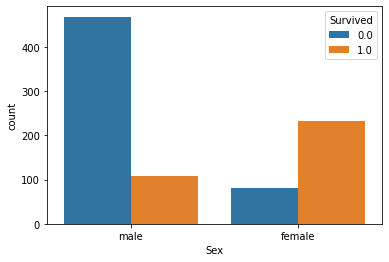

In [ ]:
sns.countplot(data['Sex'],hue=data['Survived'])

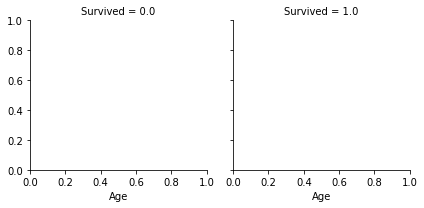

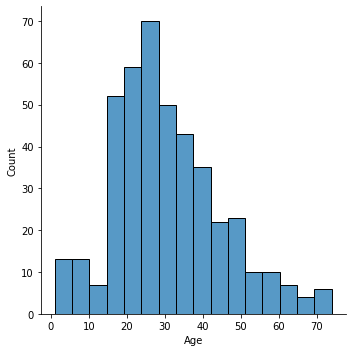

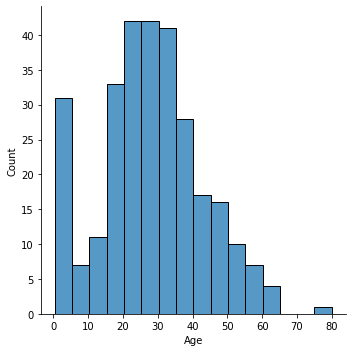

In [ ]:
#年齡跟生存率的關係，可以發現的確年齡小的存活比例高出許多
sns.FacetGrid(data,col='Survived').map(sns.displot,'Age',kde=False)

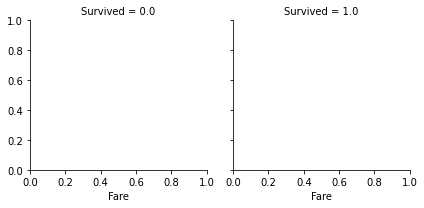

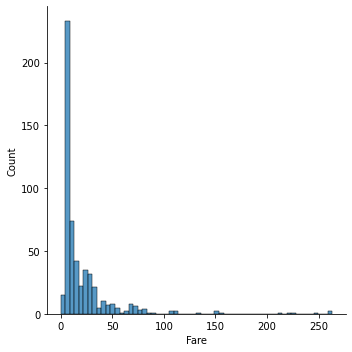

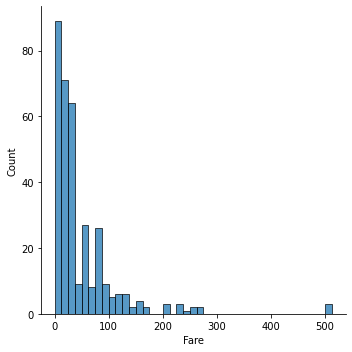

In [ ]:
#票價跟生存率的關係
sns.FacetGrid(data,col='Survived').map(sns.displot,'Fare',kde=False)

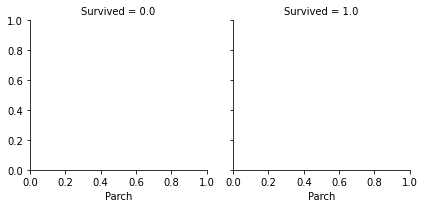

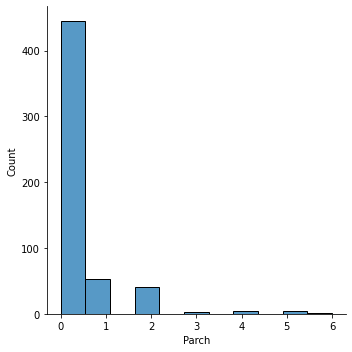

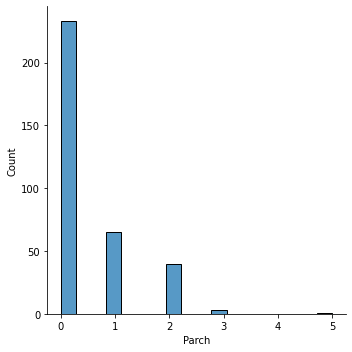

In [ ]:
#父母＋小孩的數量跟生存率的關係
sns.FacetGrid(data,col='Survived').map(sns.displot,'Parch',kde=False)

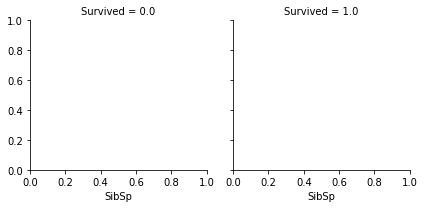

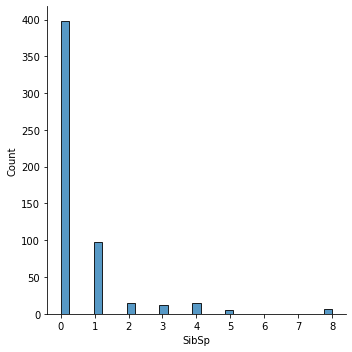

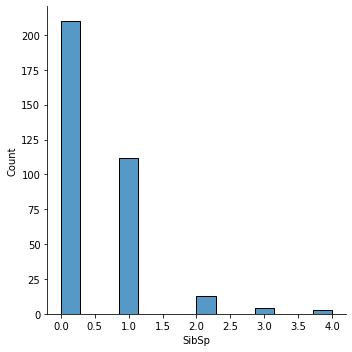

In [ ]:
#兄弟姊妹＋丈夫妻子的數量跟生存率的關係
sns.FacetGrid(data,col='Survived').map(sns.displot,'SibSp',kde=False)

In [ ]:
data['Family_Size']=data['Parch']+data['SibSp']

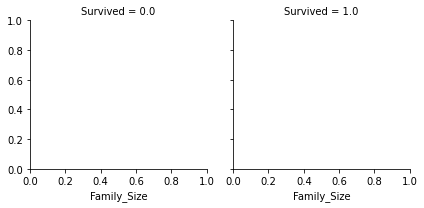

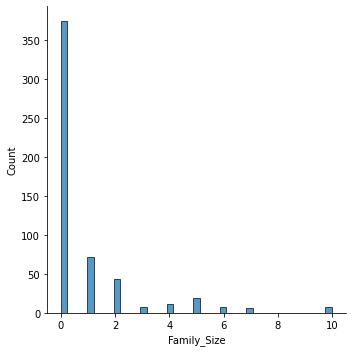

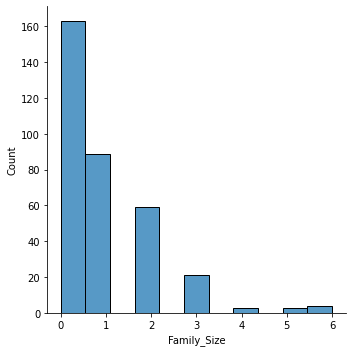

In [ ]:
sns.FacetGrid(data,col='Survived').map(sns.displot,'Family_Size',kde=False)

# 特徵工程

#### 接下來要來處理之前提到一些特徵，像是姓名這個欄位的資料就不能直接拿來用，但如果直接丟掉是一種資訊的浪費，因此我們稍微觀察一下名字這個欄位，可以發現名字的這個欄位有稱謂的資訊(Mr., Miss.) 我們可以利用這些資訊在未來更加提升預測的準確度

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
#我要拆解名字欄位，這是麻煩的寫法，下個cell比較快
# df_test=pd.DataFrame((x.split(',') for x in data['Name']),index=data.index,columns=['aa','bb'])
# data_test=pd.merge(data,df_test,right_index=True, left_index=True)
# data_test

In [ ]:
data['Name'].str.split(",",expand=True).head(3)

,0,1
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina


In [ ]:
data['Title1']=data['Name'].str.split(",",expand=True)[1]
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Title1
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr. Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss. Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs. Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr. William Henry


In [ ]:
data['Title1']=data['Title1'].str.split(".",expand=True)[0]

In [ ]:
data['Title1'].head(3)

0       Mr
1      Mrs
2     Miss
Name: Title1, dtype: object

In [ ]:
data['Title1'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer', ' Dona'], dtype=object)

##### 將稱謂對性別、生存率、以及年齡做分析，發現一個有趣的地方，像是Master平均年齡只有五歲非常小，都是男生，並且生存機率有大約6成

In [ ]:
data.groupby('Title1')['Age'].mean()

Title1
 Capt            70.000000
 Col             54.000000
 Don             40.000000
 Dona            39.000000
 Dr              43.571429
 Jonkheer        38.000000
 Lady            48.000000
 Major           48.500000
 Master           5.482642
 Miss            21.774238
 Mlle            24.000000
 Mme             24.000000
 Mr              32.252151
 Mrs             36.994118
 Ms              28.000000
 Rev             41.250000
 Sir             49.000000
 the Countess    33.000000
Name: Age, dtype: float64

In [ ]:
pd.crosstab(data['Title1'],data['Sex']).T.style.background_gradient(cmap='summer_r')

Title1,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


##### 若仔細觀察這些稱謂(’Mr’, ‘Mrs’, ‘Miss’, ‘Master’, ‘Don’, ‘Rev’, ‘Dr’, ‘Mme’, ‘Ms’, ‘Major’, ‘Lady’, ‘Sir’, ‘Mlle’, ‘Col’, ‘Capt’, ‘the Countess’, ‘Jonkheer’, ‘Dona’)會發現有些是稱謂的乘客非常少，如果我們只為了這些少數的乘客多了一個稱謂這樣對於機器學習的模型來說是一件不好的事情。因此我們把其中的稱謂做合併

In [ ]:
# 這樣無效耶，為何，只能先用白痴方法
# data['Title2'] = data['Title1'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
#          ['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Mrs'])

data['Title2'] = data['Title1'].str.replace('Mlle','Miss')
data['Title2'] = data['Title2'].str.replace('Mme','Mrs')
data['Title2'] = data['Title2'].str.replace('Ms','Miss')
data['Title2'] = data['Title2'].str.replace('Dr','Mr')
data['Title2'] = data['Title2'].str.replace('Major','Mr')
data['Title2'] = data['Title2'].str.replace('Lady','Mrs')
data['Title2'] = data['Title2'].str.replace('the Countess','Mrs')
data['Title2'] = data['Title2'].str.replace('Jonkheer','Mr')
data['Title2'] = data['Title2'].str.replace('Col','Mr')
data['Title2'] = data['Title2'].str.replace('Rev','Mr')
data['Title2'] = data['Title2'].str.replace('Capt','Mr')
data['Title2'] = data['Title2'].str.replace('Sir','Mr')
data['Title2'] = data['Title2'].str.replace('Don','Mr')
data['Title2'] = data['Title2'].str.replace('Dona','Mrs')

In [ ]:
data['Title2'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Mra'], dtype=object)

In [ ]:
# data.groupby('Title2')['Age'].mean()

In [ ]:
# data.groupby(['Title2','Pclass'])['Age'].mean()

In [ ]:
# pd.crosstab(data['Title2'],data['Sex']).T.style.background_gradient(cmap='summer_r')

In [ ]:
# list(data.groupby(['Title2','Pclass'])['Age'].mean().iteritems())[:3]

In [ ]:
# data.info()

##### 再來把票號的資訊取出前面英文的部分，因為相同的英文代碼可能代表的是房間的位置，後面的號碼沒有意義所以省略，如果只有號碼的票號就用X來表示

In [ ]:
data['Ticket'][0:5]

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [ ]:
#apply 是加入新列、strip 移除字串头尾指定的字符(默认为空格)、split 指定分隔符对字串切片
data['Ticket_info'] = data['Ticket'].apply(lambda x : x.replace(".","").replace("/","").strip().split(' ')[0] if not x.isdigit() else 'X')

In [ ]:
data['Ticket_info'].unique()

array(['A5', 'PC', 'STONO2', 'X', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH',
       'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON', 'SCA3', 'STONOQ', 'AQ4',
       'A', 'LP', 'AQ3'], dtype=object)

In [ ]:
# sns.countplot(data['Ticket_info'], hue=data['Survived'])

### Missing Value-embarked、Fare、Age

##### 由於登船港口(Embarked)只有遺漏少數，我們就直接補上出現次數最多的”S”，費用(Fare)也只有遺漏一筆，因此就直接補上平均值

In [ ]:
data['Embarked'] = data['Embarked'].fillna('S')

In [ ]:
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

##### 觀察Cabin的資料後，只取出最前面的英文字母，剩下的用NoCabin來表示

In [ ]:
data["Cabin"][0:2]

0    NaN
1    C85
Name: Cabin, dtype: object

In [ ]:
data["Cabin"] = data['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')

In [ ]:
data["Cabin"].unique()

array(['NoCabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

<AxesSubplot:xlabel='Cabin', ylabel='count'>

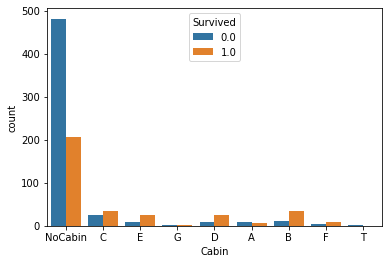

In [ ]:
sns.countplot(data['Cabin'], hue=data['Survived'])

##### 將類別資料轉為整數

In [ ]:
data['Sex'][:3]

0      male
1    female
2    female
Name: Sex, dtype: object

In [ ]:
#astype 轉換數據類型、astype('category')轉換為分類數據
#Category数据可以节省时间和空间的消耗
#.cat.codes是Category数据做映射的
data['Sex'] = data['Sex'].astype('category').cat.codes
data['Embarked'] = data['Embarked'].astype('category').cat.codes
data['Pclass'] = data['Pclass'].astype('category').cat.codes
data['Title1'] = data['Title1'].astype('category').cat.codes
data['Title2'] = data['Title2'].astype('category').cat.codes
data['Cabin'] = data['Cabin'].astype('category').cat.codes
data['Ticket_info'] = data['Ticket_info'].astype('category').cat.codes

In [ ]:
data['Sex'][:3]

0    1
1    0
2    0
Name: Sex, dtype: int8

##### 使用隨機森林來推測年齡

In [ ]:
dataAgeNull = data[data["Age"].isnull()]
dataAgeNull.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Title1,Title2,Ticket_info
5,6,0.0,2,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,7,1,0,12,2,36


In [ ]:
dataAgeNotNull = data[data["Age"].notnull()]
dataAgeNotNull.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Title1,Title2,Ticket_info
0,1,0.0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,7,2,1,12,2,2


In [ ]:
remove_outlier = dataAgeNotNull[
    #票價-票價平均後的絕對值 > 4倍票價的標準差
    (np.abs(dataAgeNotNull["Fare"]-dataAgeNotNull["Fare"].mean())>(4*dataAgeNotNull["Fare"].std()))|
    (np.abs(dataAgeNotNull["Family_Size"]-dataAgeNotNull["Family_Size"].mean())>(4*dataAgeNotNull["Family_Size"].std()))]

In [ ]:
remove_outlier.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Title1,Title2,Ticket_info
27,28,0.0,0,"Fortune, Mr. Charles Alexander",1,19.0,3,2,19950,263.0,2,2,5,12,2,36


In [ ]:
rfModel_age = RandomForestRegressor(n_estimators=2000,random_state=42)

In [ ]:
rfModel_age

RandomForestRegressor(n_estimators=2000, random_state=42)

In [ ]:
ageColumns = ['Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title1', 'Title2','Cabin','Ticket_info']
rfModel_age.fit(remove_outlier[ageColumns], remove_outlier["Age"])

RandomForestRegressor(n_estimators=2000, random_state=42)

In [ ]:
ageNullValues = rfModel_age.predict(X= dataAgeNull[ageColumns])

In [ ]:
ageNullValues[:4]

array([41.32626667, 41.61648611, 46.792625  , 41.32626667])

In [ ]:
dataAgeNull.loc[:,"Age"] = ageNullValues

In [ ]:
dataAgeNull.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Title1,Title2,Ticket_info
5,6,0.0,2,"Moran, Mr. James",1,41.326267,0,0,330877,8.4583,7,1,0,12,2,36


In [ ]:
data = dataAgeNull.append(dataAgeNotNull)
data.reset_index(inplace=True, drop=True)

In [ ]:
# dataAgeNull = data[data["Age"].isnull()]
# dataAgeNotNull = data[data["Age"].notnull()]
# remove_outlier = dataAgeNotNull[(np.abs(dataAgeNotNull["Fare"]-dataAgeNotNull["Fare"].mean())>(4*dataAgeNotNull["Fare"].std()))|
#                       (np.abs(dataAgeNotNull["Family_Size"]-dataAgeNotNull["Family_Size"].mean())>(4*dataAgeNotNull["Family_Size"].std()))                     
#                      ]
# rfModel_age = RandomForestRegressor(n_estimators=2000,random_state=42)
# ageColumns = ['Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title1', 'Title2','Cabin','Ticket_info']
# rfModel_age.fit(remove_outlier[ageColumns], remove_outlier["Age"])

# ageNullValues = rfModel_age.predict(X= dataAgeNull[ageColumns])
# dataAgeNull.loc[:,"Age"] = ageNullValues
# data = dataAgeNull.append(dataAgeNotNull)
# data.reset_index(inplace=True, drop=True)

In [ ]:
#依照Survived是否為null拆分訓練和測試集
dataTrain = data[pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])
dataTest = data[~pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])

In [ ]:
dataTrain.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size', 'Title1',
       'Title2', 'Ticket_info'],
      dtype='object')

In [ ]:
#取出需要的欄位
dataTrain = dataTrain[['Survived', 'Age', 'Embarked', 'Fare',  'Pclass', 'Sex', 'Family_Size', 'Title2','Ticket_info','Cabin']]
dataTest = dataTest[['Age', 'Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title2','Ticket_info','Cabin']]

In [ ]:
dataTrain.head(1)

,Survived,Age,Embarked,Fare,Pclass,Sex,Family_Size,Title2,Ticket_info,Cabin
263,0.0,22.0,2,7.25,2,1,1,2,2,7


### Model training

##### 載入隨機森林演算法(Random Forest)來預測存活率

In [ ]:
from sklearn.ensemble import RandomForestClassifier
 
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=12,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1) 

rf.fit(dataTrain.iloc[:, 1:], dataTrain.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.8294


In [ ]:
# 這幹啥的？
pd.concat((pd.DataFrame(dataTrain.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
4,Sex,0.264997
2,Fare,0.163890
6,Title2,0.152698
0,Age,0.131891
3,Pclass,0.091048
5,Family_Size,0.070839
8,Cabin,0.067029
7,Ticket_info,0.031735
1,Embarked,0.025873


### Submit

In [ ]:
# rf_res = rf.predict(dataTest)
# submit['Survived'] = rf_res
# submit['Survived'] = submit['Survived'].astype(int)
# submit.to_csv('submit.csv', index= False)

In [ ]:
# submit